<a href="https://colab.research.google.com/github/vittorio-pepe/Northwestern_462/blob/master/Week3_VisionAPI_VP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition with VisionAPI

In [ ]:
!pip install google-cloud-vision==1.0.0

     |████████████████████████████████| 440kB 4.7MB/s 


# Import Libraries & Credentials

In [ ]:
import os 
import io
from google.cloud import vision
from google.cloud.vision import types
from PIL import Image, ImageDraw


In [ ]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/content/visionapi-291214-a0d2eda3c577.json'

# Functions Definitions


In [ ]:
def detect_face(face_file, max_results=4):
    """Uses the Vision API to detect faces in the given file.

    Args:
        face_file: A file-like object containing an image with faces.

    Returns:
        An array of Face objects with information about the picture.
    """
    client = vision.ImageAnnotatorClient()

    content = face_file.read()
    image = types.Image(content=content)

    return client.face_detection(
        image=image, max_results=max_results).face_annotations

In [ ]:
def highlight_faces(image, faces, output_filename):
    """Draws a polygon around the faces, then saves to output_filename.

    Args:
      image: a file containing the image with the faces.
      faces: a list of faces found in the file. This should be in the format
          returned by the Vision API.
      output_filename: the name of the image file to be created, where the
          faces have polygons drawn around them.
    """
    im = Image.open(image)
    draw = ImageDraw.Draw(im)
    # Sepecify the font-family and the font-size
    for face in faces:
        box = [(vertex.x, vertex.y)
               for vertex in face.bounding_poly.vertices]
        draw.line(box + [box[0]], width=5, fill='#00ff00')
        # Place the confidence value/score of the detected faces above the
        # detection box in the output image
        draw.text(((face.bounding_poly.vertices)[0].x,
                   (face.bounding_poly.vertices)[0].y - 30),
                  str(format(face.detection_confidence, '.3f')) + '%',
                  fill='#FF0000')
        print(f'Conf: {round(face.detection_confidence, 3)}')
    im.save(output_filename)

In [ ]:
def main(input_filename, output_filename, max_results):
    with open(input_filename, 'rb') as image:
        faces = detect_face(image, max_results)
        
        print('Found {} face{}'.format(
            len(faces), '' if len(faces) == 1 else 's'))

        print('Writing to file {}'.format(output_filename))
        # Reset the file pointer, so we can read the file again
        image.seek(0)
        highlight_faces(image, faces, output_filename)

        out = Image.open(output_filename)
        display(out)

# Input Image

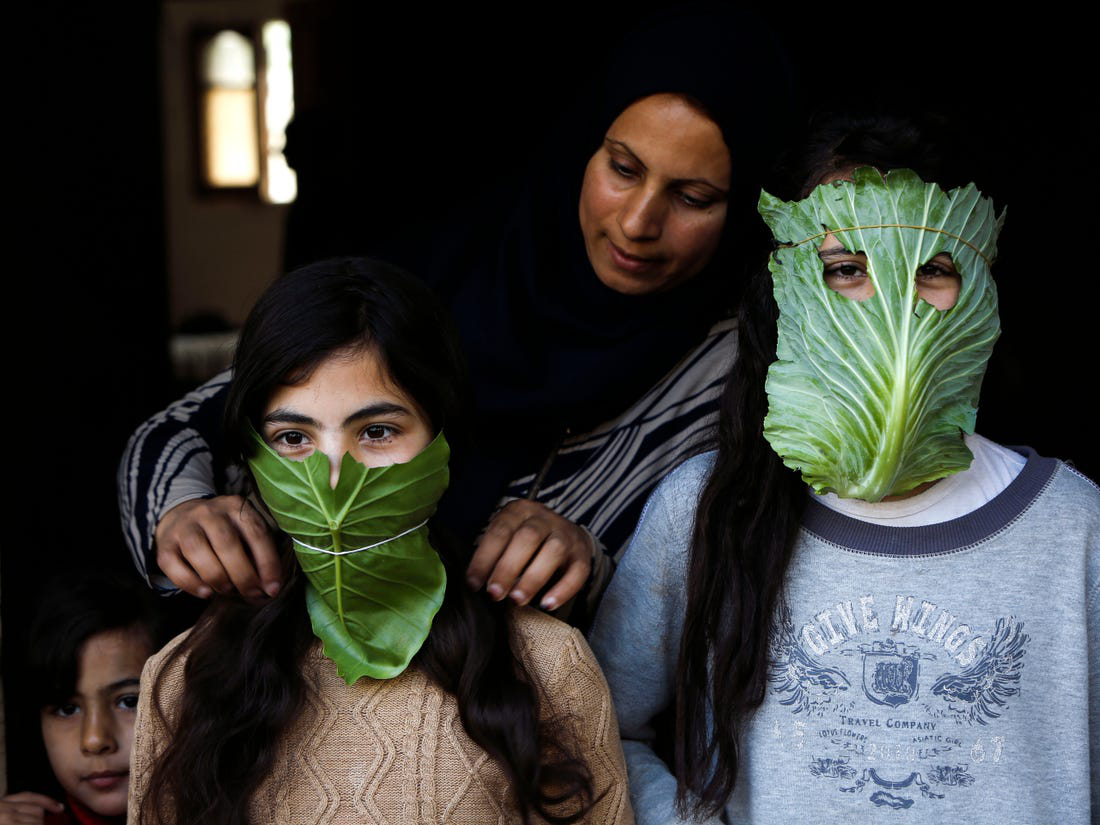

In [ ]:
image = Image.open('/content/test.jpeg')
display(image)

# Output Results


Found 4 faces
Writing to file output.jpeg
Conf: 0.978
Conf: 0.9
Conf: 0.962
Conf: 0.27


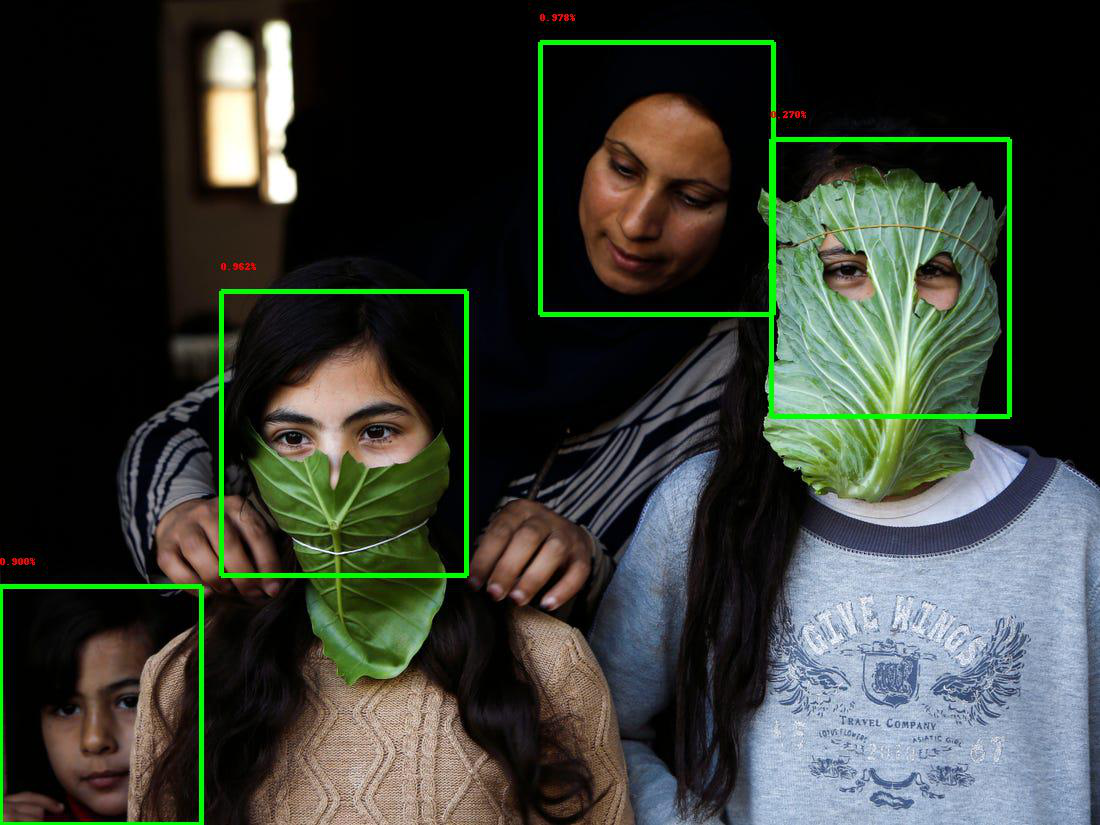

In [ ]:
main('/content/test.jpeg', 'output.jpeg', 5)